In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [5]:
import pandas as pd 
df = pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')

In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
df.shape

(145460, 23)

In [8]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [10]:
df = df.fillna(df.mode().iloc[0])

In [11]:
df.shape

(145460, 23)

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MinTemp,145460.0,12.181844,6.366881,-8.5,7.7,11.9,16.8,33.9
MaxTemp,145460.0,23.193422,7.094412,-4.8,18.0,22.5,28.2,48.1
Rainfall,145460.0,2.307990,8.389771,0.0,0.0,0.0,0.6,371.0
Evaporation,145460.0,4.834447,3.244103,0.0,4.0,4.0,5.2,145.0
Sunshine,145460.0,3.957069,4.680785,0.0,0.0,0.1,8.7,14.5
WindGustSpeed,145460.0,39.679967,13.181471,6.0,31.0,37.0,46.0,135.0
WindSpeed9am,145460.0,13.982160,8.878266,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,145460.0,18.543455,8.754403,0.0,13.0,17.0,24.0,87.0
Humidity9am,145460.0,69.430373,19.280872,0.0,57.0,70.0,84.0,100.0
Humidity3pm,145460.0,51.553396,20.471345,0.0,37.0,52.0,65.0,100.0


# Preprocessing

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In [14]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object

# Visualizing Data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


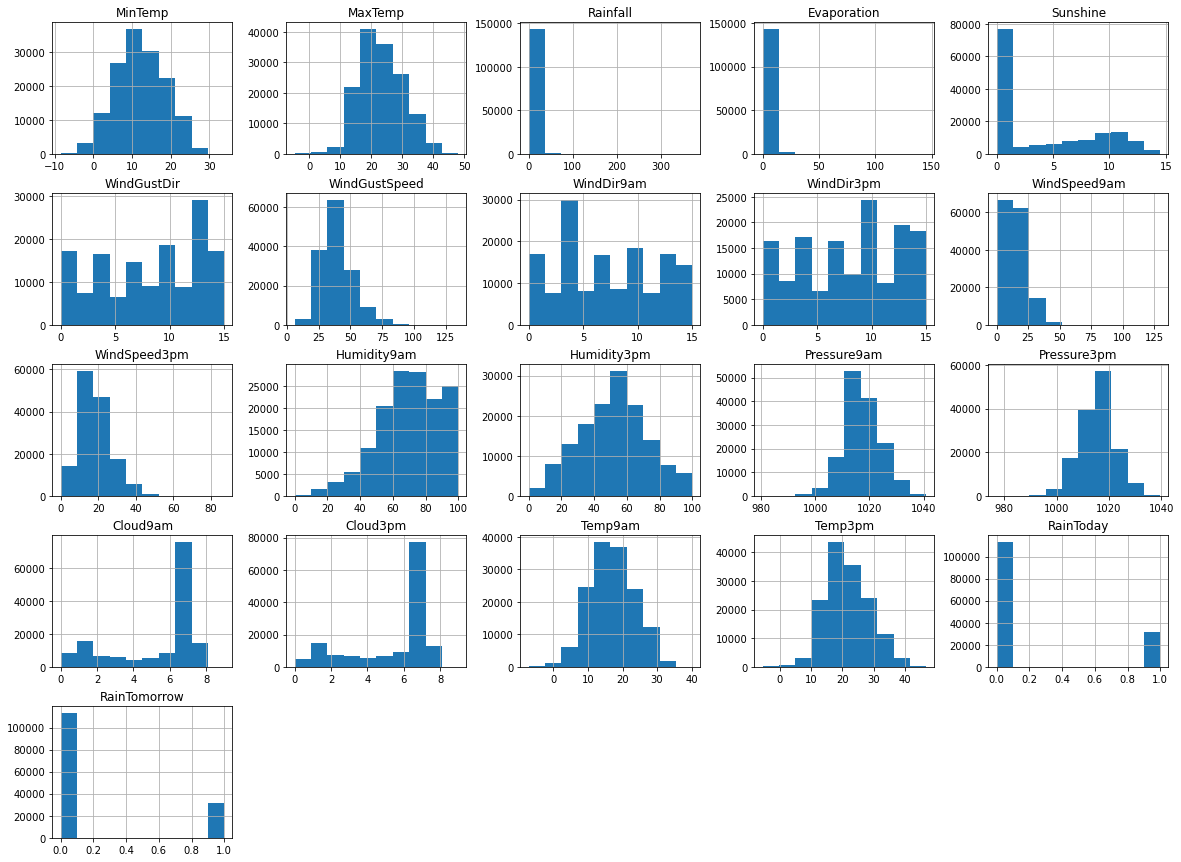

In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt 
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

In [16]:
df = df.drop(['Date','Location'],axis=1)

In [17]:
colum_name = df.columns

## Standardization Data

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(df))

In [19]:
df_scale.columns = colum_name
df_scale['RainTomorrow'] = le.fit_transform(df_scale['RainTomorrow'])

In [20]:
df_scale.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.191328,-0.041360,-0.203581,-0.257221,-0.845389,1.045228,0.327736,1.328766,1.366458,0.677819,...,0.081409,-1.443652,-1.457215,-1.224564,0.995479,0.607941,-0.014071,0.023104,-0.529795,0
1,-0.751052,0.268745,-0.275097,-0.257221,-0.845389,1.258262,0.327736,-0.221338,1.586813,-1.124341,...,-1.318948,-1.297105,-1.026898,-1.119521,0.608406,0.607941,0.032447,0.387799,-0.529795,0
2,0.112796,0.353318,-0.275097,-0.257221,-0.845389,1.471296,0.479465,1.328766,1.586813,0.565184,...,-1.630138,-1.052860,-1.472054,-0.984466,0.608406,-1.454351,0.621667,0.227333,-0.529795,0
3,-0.468338,0.677518,-0.275097,-0.257221,-0.845389,-0.872075,-1.189550,0.442992,-1.718521,-0.335896,...,-1.267083,-1.736746,0.011799,-0.369217,0.608406,0.607941,0.171999,0.708731,-0.529795,0
4,0.835287,1.283631,-0.155903,-0.257221,-0.845389,1.045228,0.100143,-1.328556,-0.176032,-0.786436,...,0.651924,-0.906314,-0.997221,-1.389630,0.608406,1.020399,0.125481,1.175541,-0.529795,0


In [21]:
X = df_scale.drop(['RainTomorrow'],axis=1)
y = df_scale['RainTomorrow']

In [22]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0.191328,-0.041360,-0.203581,-0.257221,-0.845389,1.045228,0.327736,1.328766,1.366458,0.677819,0.623294,0.081409,-1.443652,-1.457215,-1.224564,0.995479,0.607941,-0.014071,0.023104,-0.529795
1,-0.751052,0.268745,-0.275097,-0.257221,-0.845389,1.258262,0.327736,-0.221338,1.586813,-1.124341,0.394836,-1.318948,-1.297105,-1.026898,-1.119521,0.608406,0.607941,0.032447,0.387799,-0.529795
2,0.112796,0.353318,-0.275097,-0.257221,-0.845389,1.471296,0.479465,1.328766,1.586813,0.565184,0.851751,-1.630138,-1.052860,-1.472054,-0.984466,0.608406,-1.454351,0.621667,0.227333,-0.529795
3,-0.468338,0.677518,-0.275097,-0.257221,-0.845389,-0.872075,-1.189550,0.442992,-1.718521,-0.335896,-1.090136,-1.267083,-1.736746,0.011799,-0.369217,0.608406,0.607941,0.171999,0.708731,-0.529795
4,0.835287,1.283631,-0.155903,-0.257221,-0.845389,1.045228,0.100143,-1.328556,-0.176032,-0.786436,0.166379,0.651924,-0.906314,-0.997221,-1.389630,0.608406,1.020399,0.125481,1.175541,-0.529795


In [23]:
from yellowbrick.target import FeatureCorrelation
feature_names = list(X.columns)

### Feature Correlation 

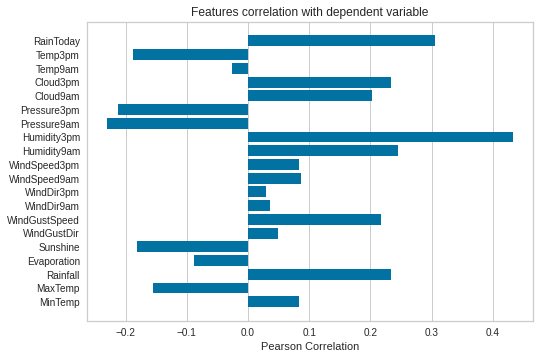

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [24]:
visualizer = FeatureCorrelation(labels = feature_names)
visualizer.fit(X, y)
visualizer.poof()

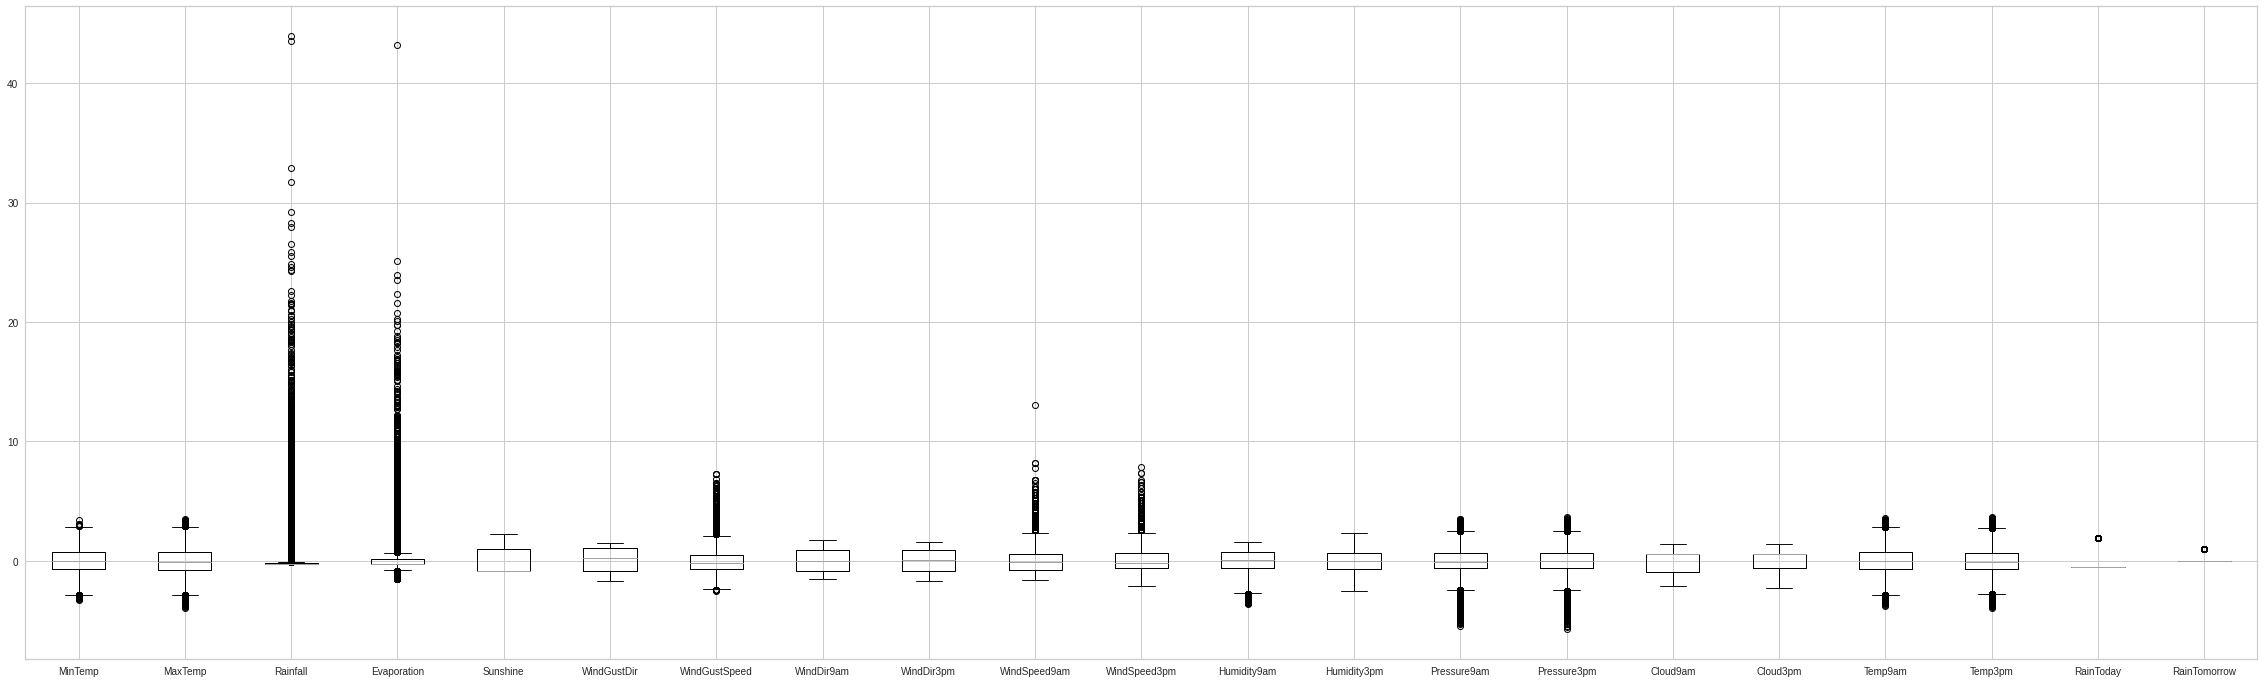

In [25]:
boxplot = df_scale.boxplot(figsize=(40, 12))

In [26]:
from sklearn.model_selection import train_test_split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size = 0.33, random_state = 42)

#  Model 1 

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

# Compile the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Visualize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model

# Define the CNN model architecture
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Create the model
model = create_model()

# Visualize the model architecture
plot_model(model, to_file='model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
